In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../resource/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
X = df.drop('class', axis=1)
y = df['class']
y = y.map({'p': 'Posionous', 'e': 'Edible'})

cat_cols = X.select_dtypes(include='object').columns.to_list()
for col in cat_cols:
    print(f"col name: {col}, N Unique: {X[col].nunique()}")

col name: cap-shape, N Unique: 6
col name: cap-surface, N Unique: 4
col name: cap-color, N Unique: 10
col name: bruises, N Unique: 2
col name: odor, N Unique: 9
col name: gill-attachment, N Unique: 2
col name: gill-spacing, N Unique: 2
col name: gill-size, N Unique: 2
col name: gill-color, N Unique: 12
col name: stalk-shape, N Unique: 2
col name: stalk-root, N Unique: 5
col name: stalk-surface-above-ring, N Unique: 4
col name: stalk-surface-below-ring, N Unique: 4
col name: stalk-color-above-ring, N Unique: 9
col name: stalk-color-below-ring, N Unique: 9
col name: veil-type, N Unique: 1
col name: veil-color, N Unique: 4
col name: ring-number, N Unique: 3
col name: ring-type, N Unique: 5
col name: spore-print-color, N Unique: 9
col name: population, N Unique: 6
col name: habitat, N Unique: 7


In [9]:
for col in cat_cols:
    X[col] = X[col].astype('category')
    X[col] = X[col].cat.codes
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [19]:
# StandardScaler用于归一化和标准化
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_std)
X_pca = np.vstack((X_pca.T, y)).T

df_pca = pd.DataFrame(X_pca, columns=['1st_Component', '2nd_Component', 'class'])
df_pca.head()

,1st_Component,2nd_Component,class
0,-0.574323,-0.975764,Posionous
1,-2.282101,0.279057,Edible
2,-1.858035,-0.270977,Edible
3,-0.884781,-0.756462,Posionous
4,0.689614,1.239276,Edible


<AxesSubplot:xlabel='1st_Component', ylabel='2nd_Component'>

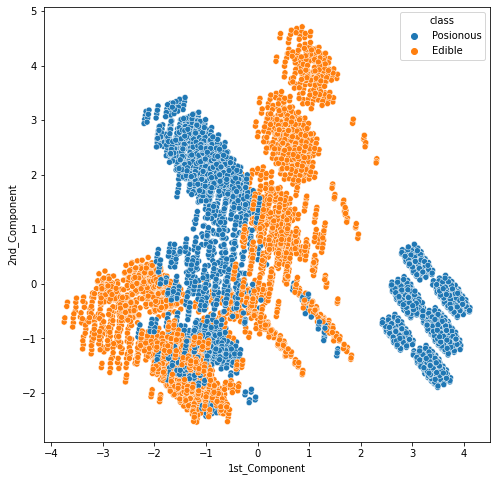

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_pca, hue='class', x='1st_Component', y='2nd_Component')
plt.show()

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
e:\visual studio code\研究生\machine-learning\markdown\other\jupyter\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,Dim1,Dim2,class
0,-47.018055,-58.935184,Posionous
1,57.887753,-23.987276,Edible
2,4.256289,48.380352,Edible
3,-49.844296,-64.070488,Posionous
4,76.446182,6.481361,Edible


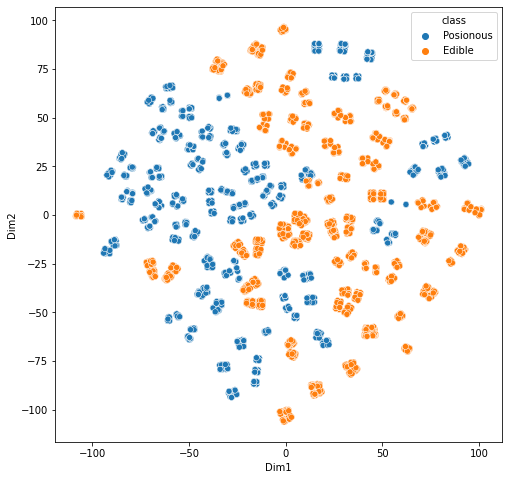

In [23]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()